# Câu Hỏi, Đáp Án và Phân Tích
The Movies Dataset

---

## 0. Môi trường và Dữ Liệu


Tất cả các thư viện môi trường dùng trong đồ án này được liệt kê trong file `environment.yml`.

Trước khi tiến hành phân tích dữ liệu, chúng ta sẽ import các thư viện sau.

In [1]:
from collections import Counter
from multiprocessing import Pool
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import ast
import wordcloud
import re
sns.set_style('whitegrid')

Với dữ liệu sau khi khám phá và xử lý sơ bộ, chúng ta sẽ sử dụng chúng để phân tích và trả lời câu hỏi. Ta vẫn lưu chúng vào DataFrame là `movies`.

In [2]:
movies = pd.read_csv('Data/movies_cleaned.csv')
movies.head(5)

adult           belongs_to_collection    budget                    genres  \
0  False            Toy Story Collection  30000000   Animation,Comedy,Family   
1  False                         UNKNOWN  65000000  Adventure,Fantasy,Family   
2  False       Grumpy Old Men Collection         0            Romance,Comedy   
3  False                         UNKNOWN  16000000      Comedy,Drama,Romance   
4  False  Father of the Bride Collection         0                    Comedy   

  original_language               original_title  \
0                en                    Toy Story   
1                en                      Jumanji   
2                en             Grumpier Old Men   
3                en            Waiting to Exhale   
4                en  Father of the Bride Part II   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

                                production_companies  \
0                            Pixar Animation Studios   
1  TriStar Pictures,Teitler Film,Interscope Commu...   
2                        Warner Bros.,Lancaster Gate   
3             Twentieth Century Fox Film Corporation   
4          Sandollar Productions,Touchstone Pictures   

       production_countries         release_date    revenue  runtime  \
0  United States of America  1995-10-30 00:00:00  373554033     81.0   
1  United States of America  1995-12-15 00:00:00  262797249    104.0   
2  United States of America  1995-12-22 00:00:00          0    101.0   
3  United States of America  1995-12-22 00:00:00   81452156    127.0   
4  United States of America  1995-02-10 00:00:00   76578911    106.0   

   spoken_languages    status  \
0           English  Released   
1  English,Français  Released   
2           English  Released   
3           English  Released   
4           English  Released   

                                             tagline  \
0                                            UNKNOWN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  video  vote_average  vote_count  
0                    Toy Story  False           7.7        5415  
1                      Jumanji  False           6.9        2413  
2             Grumpier Old Men  False           6.5          92  
3            Waiting to Exhale  False           6.1          34  
4  Father of the Bride Part II  False           5.7         173

In [3]:
movies.isnull().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
original_language        0
original_title           0
overview                 0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

## 1. Đặt câu hỏi

Ở đây, các câu hỏi được đặt ra nhắm đến mục đích mang lại lợi ích cho 2 đối tượng là: **người xem** và **nhà sản xuất**.

### Câu hỏi 1. Xu hướng phát hành phim hay thế mạnh phim ảnh của các quốc gia khác nhau là gì?

Để hiểu được vấn đề trên, chúng ta sẽ phân tích 2 khía cạnh là số lượng phim của 1 quốc gia và sự đa dạng hóa về thể loại của các quốc gia. Qua đó, ta có cái nhìn bao quát về ngành công nghiệp điện ảnh của các quốc gia.

1. **Số lượng phim phát hành theo quốc gia:**
    
    Chúng ta sẽ trả lời câu hỏi: **"Số lượng phim của các quốc gia qua các năm và nước nào phát hành nhiều phim nhất?"**

    Trả lời được câu hỏi trên sẽ:
   - Giúp người xem nhận diện các quốc gia nổi bật trong ngành công nghiệp điện ảnh.
   - Hỗ trợ nhà sản xuất phân tích thị trường tiềm năng để mở rộng hợp tác quốc tế hoặc nhắm đến khán giả toàn cầu.

2. **Đa dạng hóa về thể loại tại các quốc gia sản xuất hàng đầu:**
   
   Tiếp theo, ta sẽ đi sâu vào đặc trưng của các quốc gia sản xuất phim hàng đầu bằng câu hỏi: **"Các quốc gia phát hành nhiều phim nhất thường tập trung vào những thể loại nào, và thể loại nào đặc trưng cho từng quốc gia?"**

    Câu hỏi này giúp:
   - Hiểu rõ hơn về phong cách điện ảnh của các quốc gia khác nhau.
   - Cho người xem biết được thể loại phim nào phổ biến tại mỗi quốc gia.
   - Hỗ trợ nhà sản xuất quốc tế hóa nội dung hoặc học hỏi từ các quốc gia có nền điện ảnh phát triển.

Sau khi tìm hiểu xong các vấn đề trên, chúng ta sẽ biết được **các quốc gia nào đang dẫn đầu về phim ảnh**, ngoài ra, cũng sẽ hiểu được **xu hướng phát hành phim và thể loại phim** của các quốc gia đó. Điều này giúp người xem biết hướng để **chọn lựa phim dựa trên quốc gia và thể loại phim.**

### Câu hỏi 2: Nội dung tóm tắt (overview) có mối quan hệ như thế nào với thể loại và ảnh hưởng ra sao tới độ phổ biến và doanh thu của phim?

Với câu hỏi này, chúng ta tập trung vào 2 yếu tố chính là các từ khóa phổ biến trong overview và sự tác động của độ dài hay nội dung overview với sự thành công của 1 bộ phim. Hai vấn đề cần phân tích như sau:

1. **Độ dài và từ khóa phổ biến trong overview:**

    Trả lời câu hỏi: **"Overview thường dài bao nhiêu, và các từ hoặc cụm từ nào phổ biến trong các thể loại phim khác nhau?"**
    
    Ý nghĩa của câu hỏi này là:
    - Nhà sản xuất có thể tối ưu hóa nội dung tóm tắt để quảng bá hiệu quả hơn.
    - Người xem nhận diện từ khóa đặc trưng của từng thể loại để tìm phim phù hợp.
2. **Mối quan hệ giữa overview và thành công của phim:**

    Ta phân tích điều gì mang lại một overview tốt và thu hút: **"Nội dung tóm tắt có ảnh hưởng đến độ phổ biến hoặc doanh thu của phim không? Overview chi tiết hay ngắn gọn sẽ hiệu quả hơn?"**

    Ý nghĩa:
    - Giúp nhà sản xuất cân nhắc cách viết overview để thu hút khán giả.
    - Người xem có thể nhận định về cách overview ảnh hưởng đến sự kỳ vọng đối với phim.

## 2. Phân tích và trả lời

Trước khi tiến hành phân tích, vì chúng ta đã đọc lại dữ liệu từ file, nên chúng ta sẽ chuyển đổi dữ liệu về dạng phù hợp để phân tích.

In [4]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies[['belongs_to_collection', 'original_language', 'status']] = movies[['belongs_to_collection', 'original_language', 'status']].astype('category', errors='ignore')

### Câu hỏi 1. Xu hướng phát hành phim hay thế mạnh phim ảnh của các quốc gia khác nhau là gì?

#### 1. Số lượng phim phát hành theo quốc gia

**"Số lượng phim của các quốc gia qua các năm và nước nào phát hành nhiều phim nhất?"**

Để trả lời câu hỏi này, chúng ta sẽ phân tích số lượng phim phát hành theo quốc gia qua các năm với các bước sau:
- 1. Tạo thêm 1 cột `release_year` từ cột `release_date` để lấy năm phát hành.
- 2. Phân tách các quốc gia trong cột `production_countries` rồi đếm số lượng phim phát hành theo quốc gia.
- 3. Nhóm số lượng phim phát hành theo quốc gia và năm.
- 4. Số lượng phim của 1 năm được tính bằng tổng số phim trong năm đó và các năm trước.

In [5]:
movies['release_year'] = movies['release_date'].dt.year.astype('Int64')
movies_countries_exploded = movies.assign(countries=movies['production_countries'].str.split(',')).explode('countries')
country_year_count = movies_countries_exploded.groupby(['countries', 'release_year']).size().reset_index(name='count')
pivot_country_year_count = country_year_count.pivot(index='countries', columns='release_year', values='count').fillna(0).astype(int)
pivot_country_year_count.columns.name = 'films_in_year'
pivot_country_year_count = pivot_country_year_count.cumsum(axis=1).sort_values(by=2020, ascending=False)
pivot_country_year_count

films_in_year                1874  1878  1883  1887  1888  1890  1891  1892  \
countries                                                                     
United States of America        0     1     2     3     3     6     9    11   
UNKNOWN                         0     0     0     0     0     1     3     3   
United Kingdom                  0     0     0     0     2     3     3     3   
France                          1     1     1     1     1     1     2     3   
Germany                         0     0     0     0     0     0     0     0   
...                           ...   ...   ...   ...   ...   ...   ...   ...   
French Southern Territories     0     0     0     0     0     0     0     0   
Bermuda                         0     0     0     0     0     0     0     0   
Cayman Islands                  0     0     0     0     0     0     0     0   
Brunei Darussalam               0     0     0     0     0     0     0     0   
Barbados                        0     0     0     0     0     0     0     0   

films_in_year                1893  1894  ...   2010   2011   2012   2013  \
countries                                ...                               
United States of America       12    24  ...  16469  17128  17787  18527   
UNKNOWN                         3     3  ...   4377   4648   4948   5265   
United Kingdom                  3     3  ...   3178   3304   3452   3581   
France                          3     4  ...   2988   3129   3277   3430   
Germany                         0     0  ...   1736   1829   1899   1971   
...                           ...   ...  ...    ...    ...    ...    ...   
French Southern Territories     0     0  ...      1      1      1      1   
Bermuda                         0     0  ...      0      0      0      0   
Cayman Islands                  0     0  ...      1      1      1      1   
Brunei Darussalam               0     0  ...      0      0      0      0   
Barbados                        0     0  ...      1      1      1      1   

films_in_year                 2014   2015   2016   2017   2018   2020  
countries                                                              
United States of America     19347  20134  20841  21136  21138  21139  
UNKNOWN                       5549   5824   6053   6106   6106   6106  
United Kingdom                3747   3907   4032   4086   4087   4087  
France                        3585   3730   3880   3917   3918   3918  
Germany                       2060   2135   2186   2212   2213   2213  
...                            ...    ...    ...    ...    ...    ...  
French Southern Territories      1      1      1      1      1      1  
Bermuda                          1      1      1      1      1      1  
Cayman Islands                   1      1      1      1      1      1  
Brunei Darussalam                1      1      1      1      1      1  
Barbados                         1      1      1      1      1      1  

[161 rows x 135 columns]

In [6]:
country_melted = pivot_country_year_count.reset_index().melt(id_vars='countries', var_name='films_in_year', value_name='count')

fig = px.choropleth(country_melted, locations='countries', locationmode='country names', color='count', hover_name='countries', animation_frame='films_in_year', title='Số Lượng Phim Của Các Quốc Gia Qua Các Năm', color_continuous_scale=px.colors.sequential.Agsunset_r, projection='natural earth')

fig.update_layout(width=1200, height=600)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_traces(marker_line_color='white')
fig.show()

Sau khi lấy được số lượng phim của các quốc gia qua các năm, ta sẽ xem xét top 20 quốc gia phát hành nhiều phim nhất qua các năm.

In [7]:
top_20_countries = pivot_country_year_count.head(20)
top_20_countries

films_in_year             1874  1878  1883  1887  1888  1890  1891  1892  \
countries                                                                  
United States of America     0     1     2     3     3     6     9    11   
UNKNOWN                      0     0     0     0     0     1     3     3   
United Kingdom               0     0     0     0     2     3     3     3   
France                       1     1     1     1     1     1     2     3   
Germany                      0     0     0     0     0     0     0     0   
Italy                        0     0     0     0     0     0     0     0   
Canada                       0     0     0     0     0     0     0     0   
Japan                        0     0     0     0     0     0     0     0   
Spain                        0     0     0     0     0     0     0     0   
Russia                       0     0     0     0     0     0     0     0   
India                        0     0     0     0     0     0     0     0   
Hong Kong                    0     0     0     0     0     0     0     0   
Sweden                       0     0     0     0     0     0     0     0   
Australia                    0     0     0     0     0     0     0     0   
South Korea                  0     0     0     0     0     0     0     0   
Belgium                      0     0     0     0     0     0     0     0   
Denmark                      0     0     0     0     0     0     0     0   
Netherlands                  0     0     0     0     0     0     0     0   
China                        0     0     0     0     0     0     0     0   
Finland                      0     0     0     0     0     0     0     0   

films_in_year             1893  1894  ...   2010   2011   2012   2013   2014  \
countries                             ...                                      
United States of America    12    24  ...  16469  17128  17787  18527  19347   
UNKNOWN                      3     3  ...   4377   4648   4948   5265   5549   
United Kingdom               3     3  ...   3178   3304   3452   3581   3747   
France                       3     4  ...   2988   3129   3277   3430   3585   
Germany                      0     0  ...   1736   1829   1899   1971   2060   
Italy                        0     0  ...   1878   1924   1969   2020   2065   
Canada                       0     0  ...   1164   1246   1334   1431   1549   
Japan                        0     0  ...   1361   1408   1457   1512   1564   
Spain                        0     0  ...    696    727    763    801    843   
Russia                       0     0  ...    697    730    768    794    828   
India                        0     0  ...    503    546    590    648    692   
Hong Kong                    0     0  ...    486    509    524    540    552   
Sweden                       0     0  ...    402    428    463    501    524   
Australia                    0     0  ...    395    415    441    466    506   
South Korea                  0     0  ...    276    307    343    381    423   
Belgium                      0     0  ...    255    282    310    343    366   
Denmark                      0     0  ...    262    281    295    317    340   
Netherlands                  0     0  ...    241    266    290    305    324   
China                        0     0  ...    185    207    232    263    297   
Finland                      0     0  ...    236    254    278    298    322   

films_in_year              2015   2016   2017   2018   2020  
countries                                                    
United States of America  20134  20841  21136  21138  21139  
UNKNOWN                    5824   6053   6106   6106   6106  
United Kingdom             3907   4032   4086   4087   4087  
France                     3730   3880   3917   3918   3918  
Germany                    2135   2186   2212   2213   2213  
Italy                      2104   2127   2135   2135   2135  
Canada                     1651   1733   1764   1765   1765  
Japan   

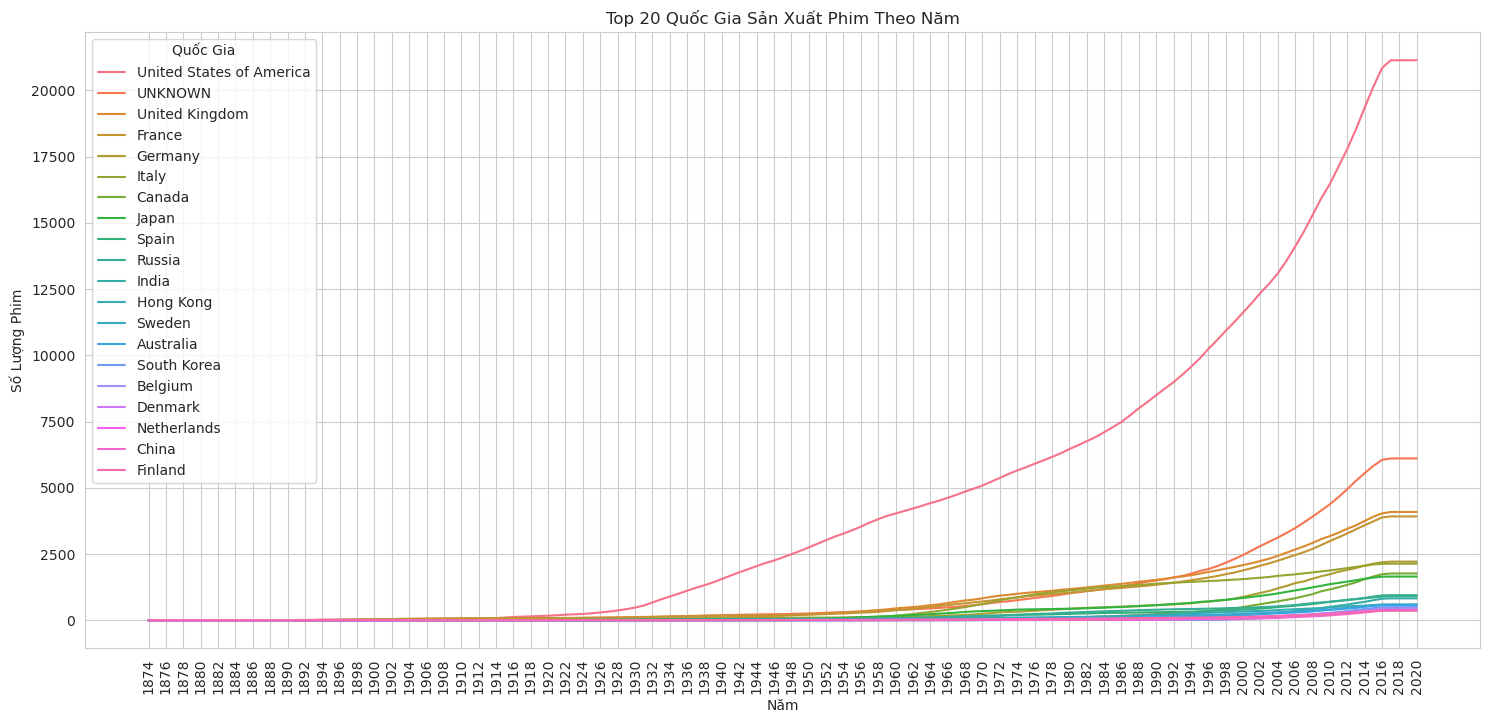

In [8]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=top_20_countries.T, dashes=False)
plt.title('Top 20 Quốc Gia Sản Xuất Phim Theo Năm')
plt.xlabel('Năm')
plt.ylabel('Số Lượng Phim')
plt.xticks(ticks=range(top_20_countries.T.index.min(), top_20_countries.T.index.max() + 1, 2), rotation=90)
plt.yticks(ticks=range(0, top_20_countries.max().max() + 1, 2500))
plt.legend(title='Quốc Gia', loc='upper left')
plt.show()

Chúng ta có các nhận xét từ biểu đồ trên như sau:

1. **Mỹ (USA)**:  
   - Luôn dẫn đầu về số lượng phim phát hành qua các năm, với khoảng cách càng nới rộng sau năm **1930**.  
   - Đặc biệt, từ năm **1990** trở đi, số lượng phim phát hành tăng đột biến, đạt tổng số **20,000 phim vào năm 2020**.

2. **Anh (UK) và Pháp (France)**:  
   - Là hai quốc gia có số lượng phim phát hành cao.  
   - Đến năm **2020**, tổng số phim của hai quốc gia này **đều vượt 3,500 phim**.

3. **Nhóm các quốc gia có số lượng phim trung bình cao**:  
   - Gồm **Đức (Germany)**, **Ý (Italy)**, **Canada**, và **Nhật Bản (Japan)**.  
   - Số lượng phim phát hành của nhóm này nằm trong khoảng **1,500 - 2,500 phim**.

4. **Các quốc gia còn lại**:  
   - Tổng số phim đến năm 2020 **dưới 1,000 phim**.  
   - **Phần Lan (Finland)** có số lượng phim thấp nhất trong nhóm, với **371 phim**.  
   - Điều này cho thấy **các quốc gia còn lại không nằm trong top:**
     - Có thể chỉ mới bắt đầu phát triển ngành công nghiệp điện ảnh.  
     - Hoặc chưa có nhiều điều kiện để sản xuất phim.

6. **Phim không có thông tin quốc gia sản xuất**:  
   - Có một số lượng lớn phim không có thông tin về quốc gia sản xuất.  
   - Dữ liệu này có thể được bổ sung dựa vào các thông tin như **ngôn ngữ** hoặc **công ty sản xuất**, nhưng:  
     - **Việc này tốn nhiều thời gian** và không đảm bảo **độ chính xác 100%**.  
   - **Giải pháp**: Trong phạm vi đồ án này, các phim không có thông tin quốc gia sản xuất sẽ **được bỏ qua**.


Sau khi đã có những phân tích như trên, chúng ta có đáp án cho câu hỏi đầu tiền của chúng ta như sau:

- Top 7 quốc gia phát hành nhiều phim nhất qua các năm là: **Mỹ (USA), Anh (UK), Pháp (France), Đức (Germany), Ý (Italy), Canada, Nhật Bản (Japan)**.
- **Mỹ (USA)** là quốc gia dẫn đầu về số lượng phim phát hành qua các năm, với tổng số **20,000 phim vào năm 2020**.

#### 2. Đa dạng hóa về thể loại tại các quốc gia sản xuất phim hàng đầu

**"Các quốc gia phát hành nhiều phim nhất thường tập trung vào những thể loại nào, và thể loại nào đặc trưng cho từng quốc gia?"**

Để trả lời câu hỏi này, chúng ta sẽ phân tích thể loại phim phổ biến của các quốc gia sản xuất phim hàng đầu. Đầu tiên chúng ta sẽ tạo 1 bảng dữ liệu mới chứa số lượng các phim theo quốc gia và thể loại phim.

In [9]:
countries_genres_exploded = movies.assign(genres=movies['genres'].str.split(',')).assign(countries=movies['production_countries'].str.split(',')).explode('genres').explode('countries')
country_genre_count = countries_genres_exploded.groupby(['countries', 'genres']).size().reset_index(name='count')
pivot_country_genre_count = country_genre_count.pivot(index='countries', columns='genres', values='count').fillna(0).astype(int)
pivot_country_genre_count = pivot_country_genre_count.reindex(pivot_country_year_count.index)
pivot_country_genre_count = pivot_country_genre_count.drop('UNKNOWN', errors='ignore')
pivot_country_genre_count

genres                       Action  Adventure  Animation  Comedy  Crime  \
countries                                                                  
United States of America       3700       2126        898    6833   2441   
United Kingdom                  561        452         96    1011    483   
France                          308        241        118    1180    407   
Germany                         247        178         70     547    200   
Italy                           269        171         10     641    245   
...                             ...        ...        ...     ...    ...   
French Southern Territories       0          1          0       0      0   
Bermuda                           0          0          0       0      0   
Cayman Islands                    0          0          0       0      0   
Brunei Darussalam                 1          0          0       0      0   
Barbados                          0          0          0       0      0   

genres                       Documentary  Drama  Family  Fantasy  Foreign  \
countries                                                                   
United States of America            1608   9042    1727     1201       74   
United Kingdom                       354   2140     209      255      136   
France                               225   2397     107      214      174   
Germany                              197   1287     107      141      105   
Italy                                 48    983      22       88      111   
...                                  ...    ...     ...      ...      ...   
French Southern Territories            0      0       0        0        0   
Bermuda                                1      0       0        0        0   
Cayman Islands                         0      1       0        0        0   
Brunei Darussalam                      0      0       0        0        0   
Barbados                               0      0       0        0        0   

genres                       ...  Horror  Music  Mystery  Romance  \
countries                    ...                                    
United States of America     ...    2680    987     1419     3576   
United Kingdom               ...     522    173      317      656   
France                       ...     205     80      204      713   
Germany                      ...     171     57      129      285   
Italy                        ...     263     20      144      263   
...                          ...     ...    ...      ...      ...   
French Southern Territories  ...       0      0        0        0   
Bermuda                      ...       0      0        0        0   
Cayman Islands               ...       0      0        1        1   
Brunei Darussalam            ...       0      0        0        0   
Barbados                     ...       0      0        0        0   

genres                       Science Fiction  TV Movie  Thriller  UNKNOWN  \
countries                                                                   
United States of America                1856       465      4368      228   
United Kingdom                           290        79       922       48   
France                                   126        12       518       86   
Germany                                  117        17       380       37   
Italy                                     80         7       294       93   
...                                      ...       ...       ...      ...   
French Southern Territories                0         0         0        0   
Bermuda                                    0         0         0        0   
Cayman Islands                             0         0         0        0   
Brunei Darussalam                          0         0         0        0   
Barbados                                   0         0         1        0   

genres                       War  Western  
countries                                  
United States of Amer

Ta xem qua sự phân bố thể loại phim của các quốc gia đứng đầu qua biểu đồ dưới đây:

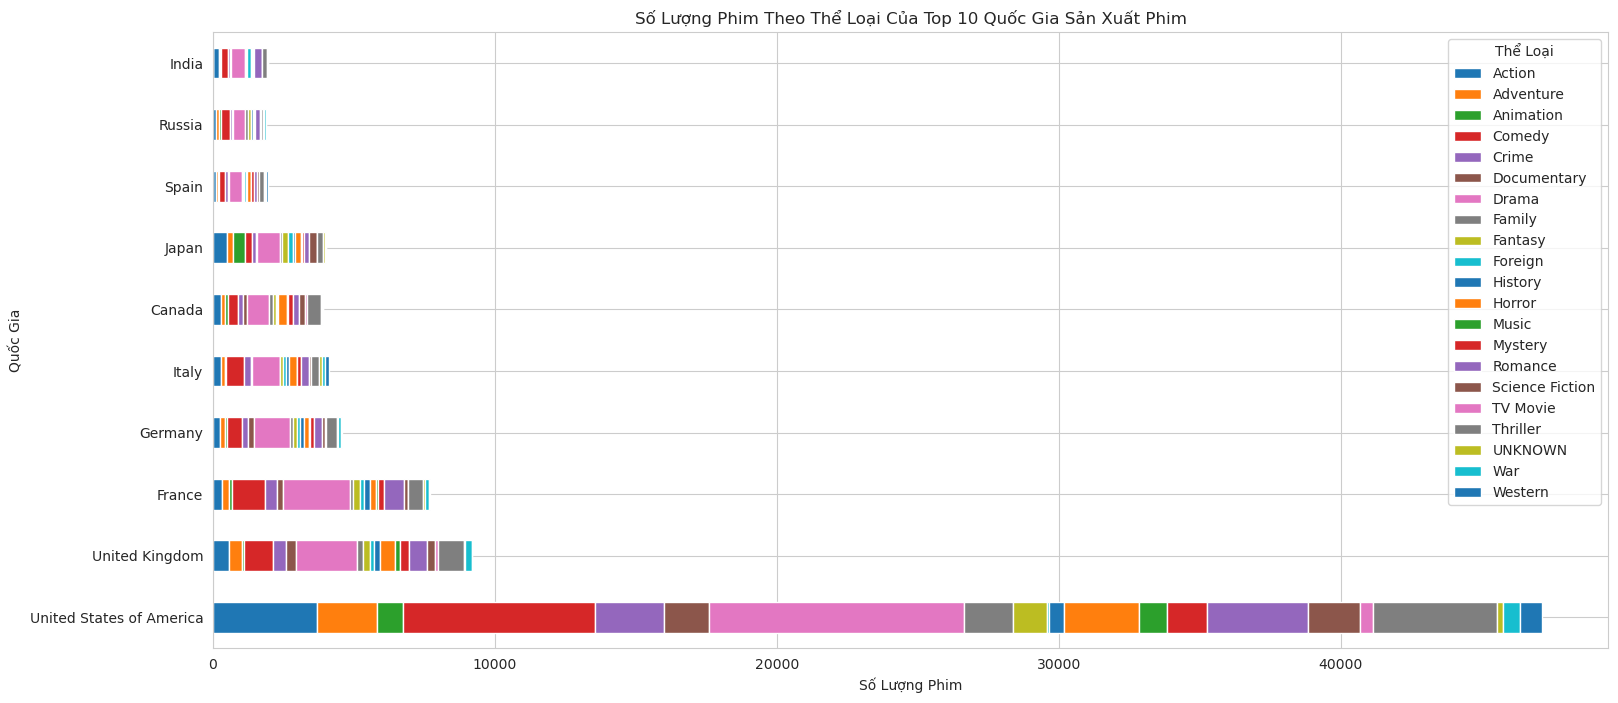

In [10]:
pivot_country_genre_count.head(10).plot(kind='barh', stacked=True, figsize=(18, 8))
plt.title('Số Lượng Phim Theo Thể Loại Của Top 10 Quốc Gia Sản Xuất Phim')
plt.xlabel('Số Lượng Phim')
plt.ylabel('Quốc Gia')
plt.legend(title='Thể Loại', loc='upper right')
plt.show()


Tíếp theo, ta sẽ xem xét các thể loại được top 7 quốc gia mà ta đã xác định ở trên tập trung sản xuất.

In [11]:
top_7_countries_genres = pivot_country_genre_count.head(7)
top_7_countries_genres

genres                    Action  Adventure  Animation  Comedy  Crime  \
countries                                                               
United States of America    3700       2126        898    6833   2441   
United Kingdom               561        452         96    1011    483   
France                       308        241        118    1180    407   
Germany                      247        178         70     547    200   
Italy                        269        171         10     641    245   
Canada                       291        145         80     382    155   
Japan                        510        204        410     264    129   

genres                    Documentary  Drama  Family  Fantasy  Foreign  ...  \
countries                                                               ...   
United States of America         1608   9042    1727     1201       74  ...   
United Kingdom                    354   2140     209      255      136  ...   
France                            225   2397     107      214      174  ...   
Germany                           197   1287     107      141      105  ...   
Italy                              48    983      22       88      111  ...   
Canada                            151    774     135      113       27  ...   
Japan                              45    818      76      220      161  ...   

genres                    Horror  Music  Mystery  Romance  Science Fiction  \
countries                                                                    
United States of America    2680    987     1419     3576             1856   
United Kingdom               522    173      317      656              290   
France                       205     80      204      713              126   
Germany                      171     57      129      285              117   
Italy                        263     20      144      263               80   
Canada                       328     47      159      202              222   
Japan                        217     22       77      175              292   

genres                    TV Movie  Thriller  UNKNOWN  War  Western  
countries                                                            
United States of America       465      4368      228  594      776  
United Kingdom                  79       922       48  236       28  
France                          12       518       86  147       38  
Germany                         17       380       37  107       41  
Italy                            7       294       93   99      142  
Canada                          87       492       33   28       18  
Japan                            4       213       61   43        4  

[7 rows x 21 columns]

Chúng ta sẽ trực quan hóa dữ liệu trên qua 7 biểu đồ tròn, mỗi biểu đồ tương ứng với 1 quốc gia. Mỗi biểu đồ sẽ thể hiện tỷ lệ phần trăm số lượng phim theo thể loại. Để dễ quan sát, chúng ta chỉ hiển thị 5 thể loại chiếm tỉ trọng lớn nhất, còn lại sẽ được gộp thành `Other`.

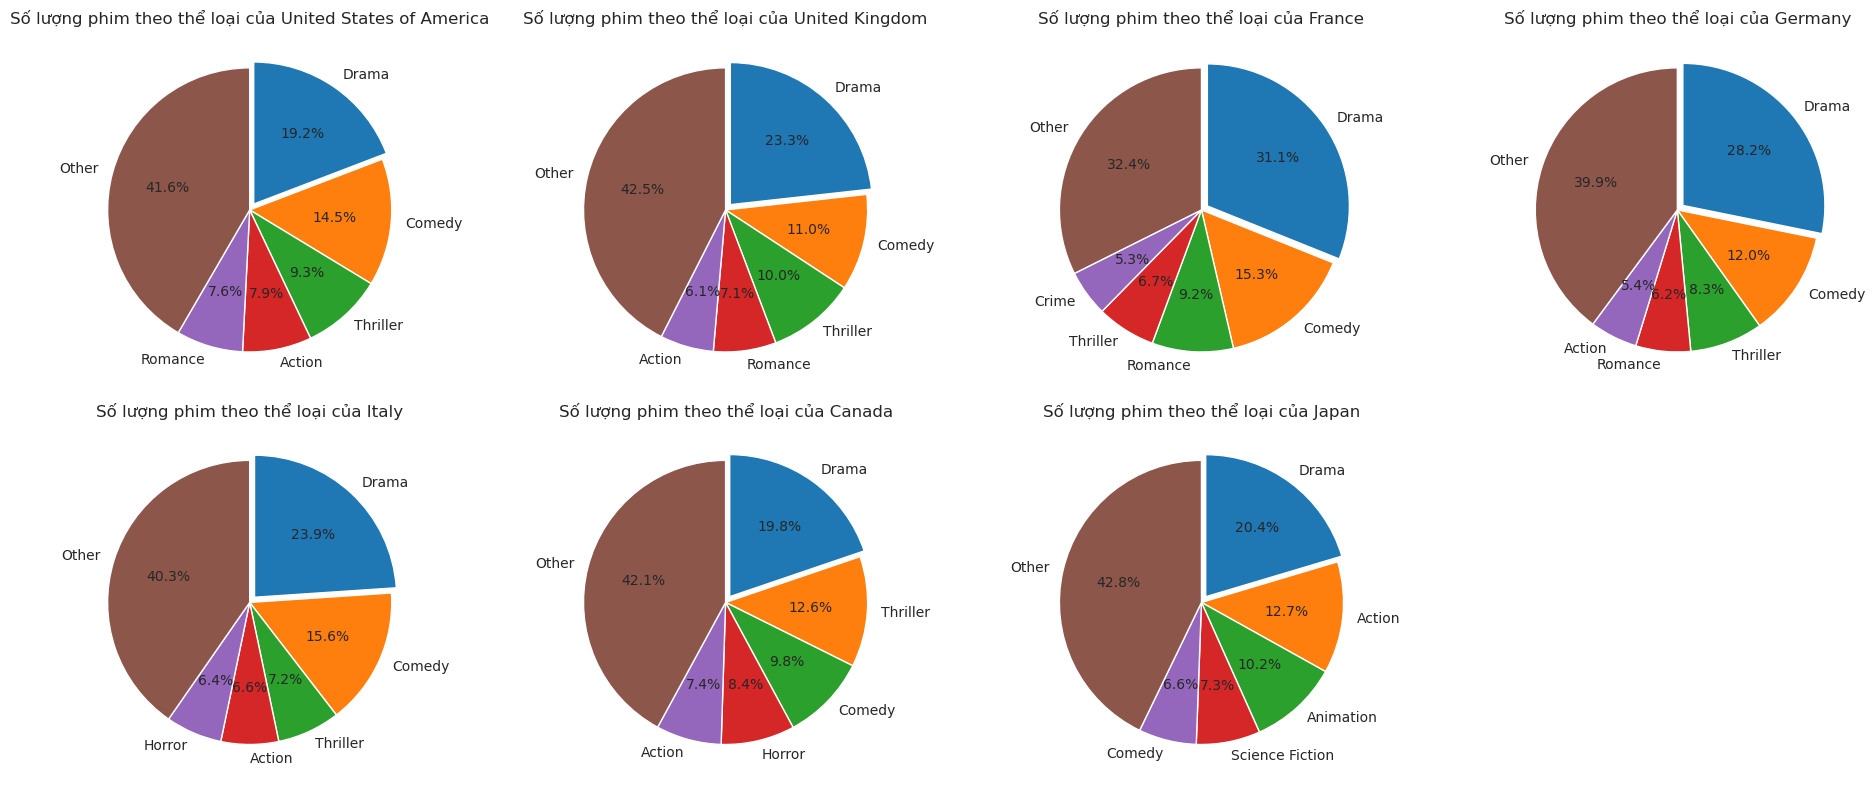

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(19, 8))
axes = axes.flatten()

explode = [0.05] + [0] * 5

for i, country in enumerate(top_7_countries_genres.index):
    data = top_7_countries_genres.loc[country]
    largest_genres = data.nlargest(5)
    other_genres = data.sum() - largest_genres.sum()
    largest_genres['Other'] = other_genres
    axes[i].pie(largest_genres, labels=largest_genres.index, autopct='%1.1f%%', startangle=90, counterclock=False, explode=explode)
    axes[i].set_title(f'Số lượng phim theo thể loại của {country}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Từ các biểu đồ trên, chúng ta có thể rút ra những nhận xét sau:

- **Other chiếm tỷ lệ lớn nhất** ở tất cả các quốc gia, điều này cho thấy các quốc gia cũng có nhiều thể loại phim nhỏ.
- **Drama là thể loại phổ biến nhất** ở tất cả các quốc gia, phản ánh sự ưa chuộng về phim chính kịch. Có vẻ như thể loại này là phổ biến và không thể thiếu ở bất kỳ quốc gia nào.
- **Các nước phương tây** mặc dù tập trung nhiều vào Drama nhưng cũng có sự cân bằng giữa các thể loại như Comedy hay Thriller.
- **Nhật Bản** là quốc gia duy nhất nổi bật với Animation và Action, phản ánh đặc trưng văn hóa và ngành công nghiệp anime mạnh mẽ.
- Một vài thể loại khác cũng có số lượng phim khá tốt như Horror ở **Canada** và **Ý** hay Romance ở **Mỹ**, **Pháp** và **Anh**.

Như vậy ta thấy các quốc gia dẫn đầu về phim ảnh có xu hướng tập trung vào thể loại phim chính kịch như **Drama**, nhưng cũng có sự đa dạng về các thể loại khác như **Comedy, Thriller, Action, Animation, Horror, Romance.**

Cuối cùng, sau khi phân tích cả 2 phần trên, chúng ta có các kết luận sau:

- **Mỹ (USA)** là quốc gia dẫn đầu về số lượng phim phát hành qua các năm. Vì thế, số lượng phim của Mỹ cũng rất đa dạng về thể loại.
- **Drama** là thể loại phổ biến nhất ở tất cả các quốc gia, tiếp theo là **Comedy** và **Thriller**.
- **Nhật Bản** nổi bật với **Animation** và **Action**.
- **Canada** và **Ý** có sự tập trung vào **Horror**.
- **Mỹ**, **Pháp** và **Anh** cũng có kho phim **Romance** rộng lớn.

Từ đó, chúng ta có thể cung cấp 1 số các thông tin hữu ích cho người xem và nhà sản xuất như sau:
- **Người xem**:
  - **Chọn lựa phim dựa trên quốc gia**: Nếu bạn muốn xem phim của một quốc gia cụ thể, bạn có thể chọn Mỹ, Anh, Pháp, Đức, Ý, Canada, Nhật Bản.
  - **Chọn lựa phim dựa trên thể loại**: Nếu bạn muốn xem phim theo thể loại, bạn có thể chọn Drama, Comedy, Thriller, Action, Animation, Horror, Romance.
  - **Chọn lựa phim dựa trên quốc gia và thể loại**: Nếu bạn muốn xem phim của một quốc gia cụ thể và theo thể loại, bạn có thể chọn Mỹ với Drama, Comedy, Thriller, Romance, Pháp với Drama, Comedy, Thriller, Anh với Drama, Comedy, Thriller, Nhật Bản với Animation, Action, Drama, Comedy.
- **Nhà sản xuất**:
  - Có thể mở rộng thể loại phim để thu hút nhiều đối tượng khán giả hơn. Ví dụ, nếu muốn mở rộng thị trường tại Nhật Bản, có thể sản xuất phim Animation.
  - Cũng có thể đánh vào các ngách thị trường như Horror ở Canada và Ý.
  - Vì thể loại Drama phổ biến ở hầu hết các quốc gia, nên cũng có thể sản xuất phim theo thể loại này.

### Câu hỏi 2: Nội dung tóm tắt (overview) có mối quan hệ như thế nào với thể loại và ảnh hưởng ra sao tới độ phổ biến và doanh thu của phim?

#### 1. Độ dài và từ khóa phổ biến trong overview

**"Overview thường dài bao nhiêu, và các từ hoặc cụm từ nào phổ biến trong các thể loại phim khác nhau?"**

Đầu tiên chúng ta xem các thông số của độ dài overview, sau đó phân tích các từ khóa phổ biến trong overview theo thể loại phim. Đầu tiên, chúng ta sẽ tạo 1 biến mới `overview_length` để lưu độ dài của overview.

In [13]:
movies['overview_length'] = movies['overview'].str.split().str.len()
print("Thông tin về số lượng từ trong mô tả phim:")
print(movies['overview_length'].describe().to_string())

Thông tin về số lượng từ trong mô tả phim:
count    45189.000000
mean        54.271902
std         35.263742
min          1.000000
25%         26.000000
50%         47.000000
75%         73.000000
max        187.000000


Ta plot thêm barchart để nhìn rõ hơn về sự phân bố số lượng từ trong overview của các phim.

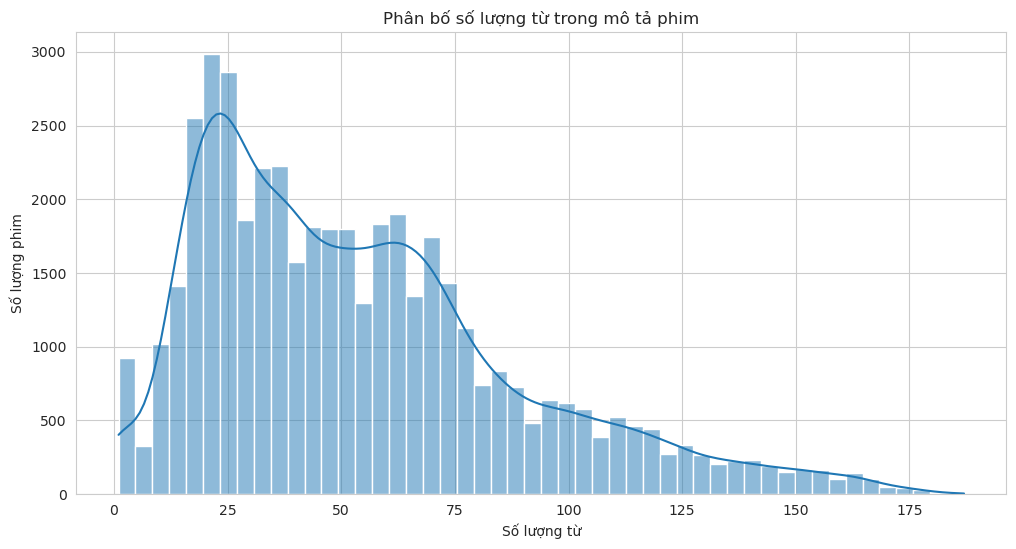

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(movies['overview_length'], bins=50, kde=True)
plt.title('Phân bố số lượng từ trong mô tả phim')
plt.xlabel('Số lượng từ')
plt.ylabel('Số lượng phim')
plt.show()

Như vậy, ta thấy được:
- **Độ dài trung bình** của overview là **54 từ**, với max là 187 từ và min là 1 từ.
- Có thể thấy phía trên là 1 biểu đồ lệch về bên trái, điều này cho thấy **phần lớn các phim có overview ngắn** và 1 vài trường hợp cũng rất dài. Đa số các phim có tóm tắt dài khoảng từ 10 đến 75 từ, chiếm **hơn 50%** tổng số phim.

Tiếp đến, ta sẽ phân tích các từ khóa phổ biến trong overview theo thể loại phim.

In [15]:
genres = movies['genres'].str.split(',').explode().value_counts()
genres = genres.index.drop('UNKNOWN')
stopwords = set(wordcloud.STOPWORDS)
stopwords = stopwords.union({'movie', 'film', 'story', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'find', 'world', 'life', 's'})

Chúng ta sẽ xem xét 3 từ khóa phổ biến nhất trong overview của các thể loại phim. Để làm điều này, chúng ta sẽ sử dụng Counter để đếm số lần xuất hiện của các từ khóa trong từng thể loại phim.

In [16]:
def get_top_keywords(genre, n):
    genre_overviews = movies[movies['genres'].str.contains(genre, na=False)]['overview']
    all_words = ' '.join(genre_overviews.dropna()).lower()
    all_words = re.findall(r'\b\w+\b', all_words)
    filtered_words = [word for word in all_words if word not in stopwords]
    most_common_words = Counter(filtered_words).most_common(n)
    return [word for word in most_common_words]

top_keywords_by_genre_grouped = pd.DataFrame({
    'genre': genres,
    'overview keywords': [','.join([word for word, count in get_top_keywords(genre, 3)]) for genre in genres]
})
top_keywords_by_genre_grouped

genre      overview keywords
0             Drama         young,love,man
1            Comedy           new,love,man
2          Thriller          young,man,new
3           Romance         love,young,man
4            Action           man,new,must
5            Horror          young,man,new
6             Crime       police,man,young
7       Documentary  documentary,new,years
8         Adventure         new,young,must
9   Science Fiction         earth,new,time
10           Family         family,new,old
11          Mystery       young,murder,man
12          Fantasy          young,new,man
13        Animation          new,will,must
14          Foreign         love,young,man
15            Music        music,band,love
16          History         war,young,love
17              War        war,army,german
18          Western          town,man,gang
19         TV Movie   new,family,christmas

Để có cái nhìn tốt hơn, ta trực quan hóa các từ khóa với độ phổ biến của chúng trong từng thể loại phim. Ta sẽ sử dung WordCloud để làm điều này.

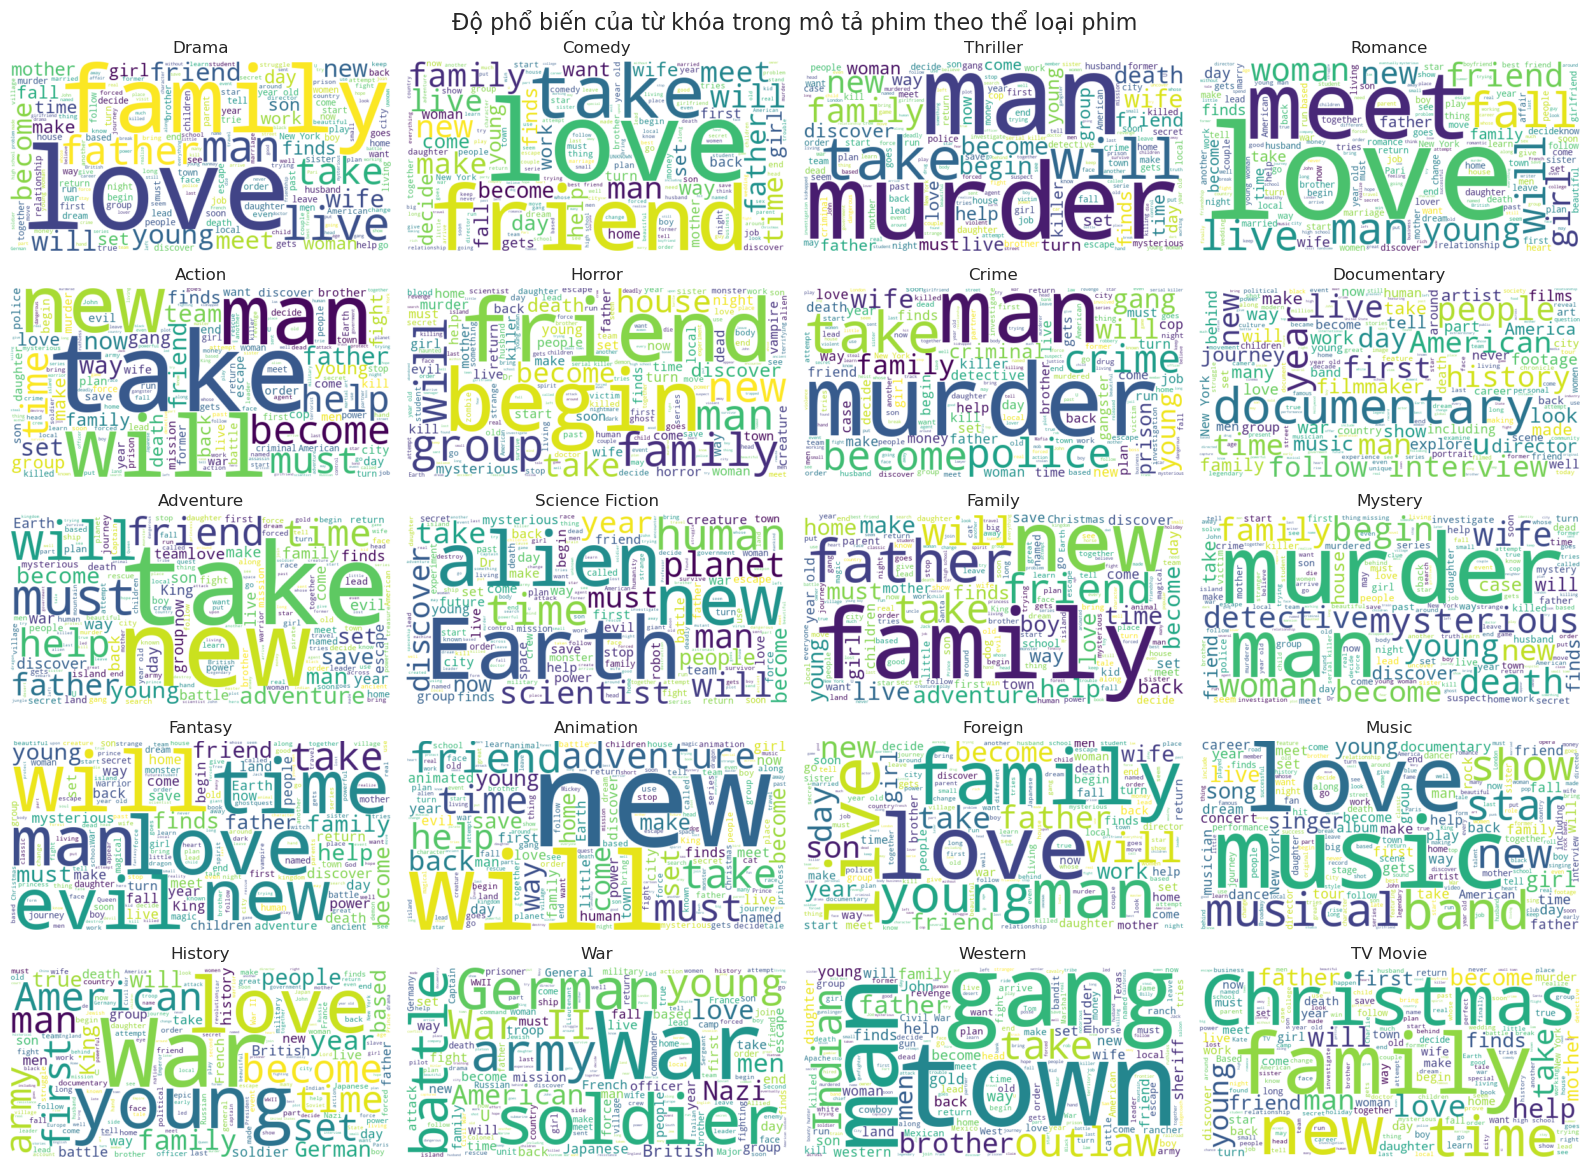

In [17]:
genre_overview_dict = {}
for genre in genres:
    genre_overviews = movies[movies['genres'].str.contains(genre, na=False)]['overview']
    genre_overview_dict[genre] = ' '.join(genre_overviews.dropna().values)

def generate_wordcloud(genre):
    return wordcloud.WordCloud(
        width=600, height=300, background_color='white', stopwords=stopwords
    ).generate(genre_overview_dict[genre])

with Pool(processes=4) as pool:
    wordclouds = pool.map(generate_wordcloud, genres)

fig, axes = plt.subplots(5, 4, figsize=(16, 12))
axes = axes.flatten()

for i, wc in enumerate(wordclouds):
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(genres[i])
    axes[i].axis('off')

for j in range(len(genres), len(axes)):
    axes[j].axis('off')

plt.suptitle('Độ phổ biến của từ khóa trong mô tả phim theo thể loại phim', fontsize=16)
plt.tight_layout()
plt.show()

Từ các hình trên, ta có nhận xét chung như sau:

- **Từ khóa phổ biến và lặp lại giữa các thể loại:**

  - Các từ như "love", "family", "man", "take", "new" xuất hiện nhiều trong hầu hết các thể loại.
  - Điều này cho thấy các từ này là phổ biến và không đặc trưng cho một thể loại cụ thể. Có thể chúng thường xuất hiện trong các tóm tắt về mối quan hệ, gia đình và nhân vật chính trong các phim có thể loại **Drama, Comedy và Family.**
  - Có thể các thể loại này thường đi chung với nhau hoặc có nhiều điểm chung về nội dung.

- **Thể loại có từ khóa đặc trưng:**

  - **Crime, Thriller và Mystery** có các từ khóa như "murder", "man" là nổi bật, thể hiện sự tập trung vào yếu tố giết người, giật gân. Ngoài ra, còn có các từ rất đặc trưng như **Crime** có "crime", "police", **Mystery** thì có "mysterious" hay "death".
  - **Science Fiction** có các từ "alien", "time", "Earth", "human" phản ánh những chủ đề điển hình về khoa học, không gian và tương lai viễn tưởng.
  - **War** là 1 chủ đề rât đặc trưng, ít khi lẫn với các thể loại khác. Chúng ta có thể thấy điều đó qua các từ khóa "soldier", "War", "Nazi", "German", "War II", "battle" gợi lên hình ảnh về chiến tranh, quân sự, và thời kỳ thế chiến.
  - **History** cũng xuất hiện "love", "War" tượng trưng cho tình yêu và chiến tranh, cũng thường được diễn tả trong các bộ phim lịch sử. Bên cạnh đó, còn các từ như "King", "American", "become" hay "young" cũng cho ta thấy được tính lịch sử quanh đây.
  - **Western**: Từ "gang", "town" thể hiện các đặc điểm của dòng phim miền Tây như thị trấn nhỏ và băng đảng.
  - Từ khóa của các thể loại tình cảm **Romance** như "fall", "love", "meet" làm nổi bật yếu tố lãng mạn và mối quan hệ cá nhân.
  - Thể loại **Documentary** có từ khóa khá chung chung ("documentary", "filmmaker", "American"), có lẽ là do đây là phim tài liệu nên có những từ đơn giản và học thuật, không cần phải có  thu hút người xem.

#### 2. Mối quan hệ giữa overview và thành công của phim

**"Nội dung tóm tắt có ảnh hưởng đến độ phổ biến hoặc doanh thu của phim không? Overview chi tiết hay ngắn gọn sẽ hiệu quả hơn?"**

Để trả lời câu hỏi này, chúng ta sẽ phân tích mối quan hệ giữa độ dài của overview và độ phổ biến, doanh thu của phim thông qua các biểu đồ.

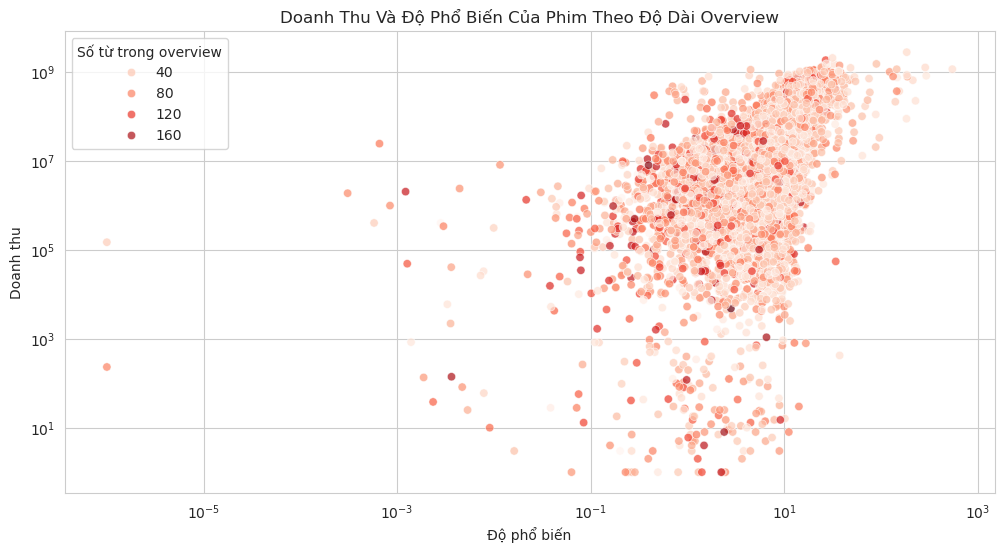

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies, x='popularity', y='revenue', hue='overview_length', alpha=0.7, palette='Reds')
plt.title('Doanh Thu Và Độ Phổ Biến Của Phim Theo Độ Dài Overview')
plt.xlabel('Độ phổ biến')
plt.ylabel('Doanh thu')
plt.yscale('log')
plt.xscale('log')
plt.legend(title='Số từ trong overview', loc='upper left')
plt.show()

Với biểu đồ trên, ta nhận thấy:

- Các giá trị tập trung đa số ở **độ phổ biến từ 0,1 đến 10** và **doanh thu từ 100 ngàn đến khoảng 1 tỷ USD**, và các giá trị có xu hướng hội tụ ở phía trái trên của biểu đồ. Điều này là hợp lý vì các phim có độ phổ biến cao thì sẽ có doanh thu cao hơn.
- Có vẻ như **độ dài của overview không ảnh hưởng nhiều đến độ phổ biến và doanh thu của phim.** Có thể thấy rằng các phim có độ dài overview từ 0 đến 160 từ có thể có độ phổ biến và doanh thu cao hoặc thấp, không có mối quan hệ rõ ràng giữa độ dài overview và độ phổ biến, doanh thu của phim.
- Nhưng ở đây, ta có thể thấy đa số phim có độ **phổ biến lẫn doanh thu rất cao** thường có **độ dài overview từ 0 đến 80 từ**, điều này cho thấy overview dưới 80 từ có thể làm tăng khả năng phim trở nên phổ biến và có doanh thu cao.

Để làm rõ cho câu hỏi "overview chi tiết hay ngắn gọn tốt hơn", chúng ta sẽ phân loại overview thành 2 nhóm: **ngắn gọn** và **chi tiết** dựa trên giá trị trung bình là **54 từ**. Sau đó, chúng ta sẽ xem biểu đồ thể hiện mối quan hệ giữa chúng

In [19]:
movies['overview_type'] = np.where(movies['overview_length'] < 54, 'short', 'detail')

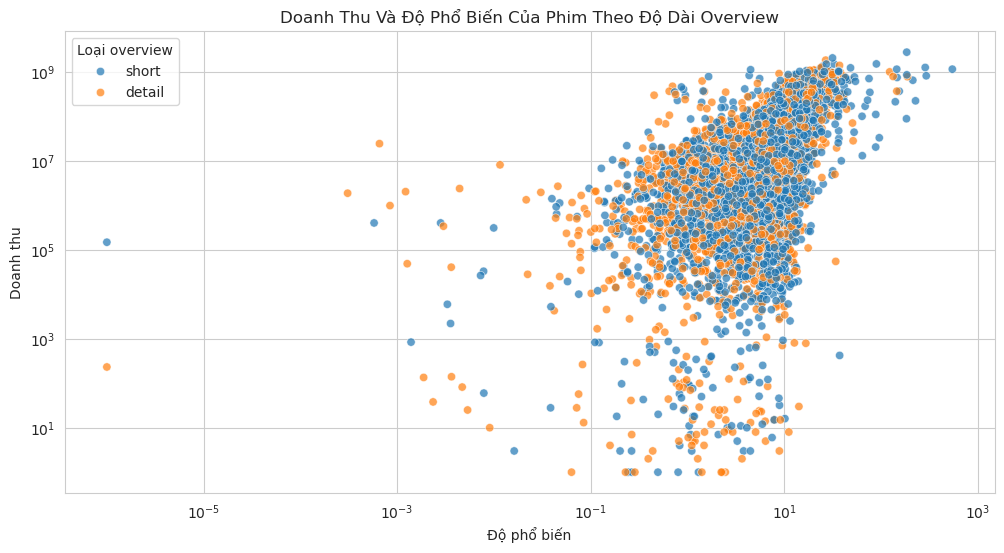

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies, x='popularity', y='revenue', hue='overview_type', alpha=0.7)
plt.title('Doanh Thu Và Độ Phổ Biến Của Phim Theo Độ Dài Overview')
plt.xlabel('Độ phổ biến')
plt.ylabel('Doanh thu')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Loại overview', loc='upper left')
plt.show()

Ta có thể thấy, sau khi phân thành 2 nhóm, sự phân bố của độ phổ biến và doanh thu giữa 2 nhóm không có sự chênh lệch lớn. Điều này cho thấy **độ dài của overview không ảnh hưởng nhiều đến độ phổ biến và doanh thu của phim.** Có thể thấy rằng **overview ngắn gọn hoặc chi tiết đều có thể làm tăng khả năng phim trở nên phổ biến và có doanh thu cao.**

Như vậy, sau khi tìm hiểu các khía cạnh của overview, chúng ta có thể rút ra các kết luận sau:

- **Độ dài thông thường của overview** nằm trong khoảng từ 40 đến 60 từ, với độ dài trung bình là 54 từ.
- Việc overview chi tiết hay ngắn gọn có vẻ không ảnh hưởng nhiều đến độ phổ biến và doanh thu của phim.
- **Các từ khóa phổ biến** như "love", "family", "man", "take", "new" xuất hiện nhiều trong hầu hết các thể loại, không đặc trưng cho một thể loại cụ thể.
- Một số từ khóa đặc trưng cho các thể loại phim như "murder", "man" cho **Thriller**, "crime", "police" cho **Crime**, "death", "mysterious" cho **Mystery**, "alien", "Earth" cho **Science Fiction**, "war", "german", "army" cho **History và War** hoặc "town", "gang" cho **Western** hay "family", "Christmas" cho **TV Movie**...

Từ những thông tin trên, ta có thể đem lại cho:  

- **Người xem**:  
  + **Dễ nhận diện thể loại phim**: Các từ khóa đặc trưng như "alien", "Earth" cho phim **Khoa học viễn tưởng** hay "crime", "police" cho phim **Hình sự** giúp khán giả nhanh chóng hiểu nội dung chính.  
  + **Tiết kiệm thời gian chọn phim**: Không cần đọc các overview dài dòng mà vẫn nắm bắt được nội dung và thể loại phim phù hợp với sở thích.  
  + **Tăng sự hài lòng khi xem**: Chọn đúng phim với nội dung phù hợp kỳ vọng nhờ thông tin tổng quan ngắn gọn và từ khóa chính xác.  

- **Nhà sản xuất**:  
  + **Xây dựng overview hiệu quả**: Tập trung sử dụng các từ khóa phổ biến hoặc đặc trưng theo thể loại để thu hút đúng nhóm khán giả mục tiêu. Ví dụ, từ "murder" cho phim **Giật gân**, "Christmas" cho **Phim truyền hình**.  
  + **Giảm chi phí viết nội dung**: Không cần đầu tư quá nhiều thời gian và công sức để viết overview dài dòng, mà chỉ cần ngắn gọn, súc tích nhưng vẫn nổi bật.  
  + **Tăng cơ hội tiếp cận khán giả**: Overview với các từ khóa phổ biến như "love", "family" giúp tiếp cận nhiều đối tượng hơn, bất kể thể loại phim.  
